# EDA de Predicción de la popularidad de un negocio


In [2]:
import pandas as pd

# Cargar los datos del negocio
business_df = pd.read_json('./data/dataset_business.json', lines=True)

# Cargar los datos de las reseñas
#review_df = pd.read_json('./data/dataset_review.json', lines=True)

# Cargar los datos de checkins
checkin_df = pd.read_json('./data/dataset_checkin.json', lines=True)

In [11]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117618 entries, 0 to 117617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     117618 non-null  object 
 1   name            117618 non-null  object 
 2   city            117618 non-null  object 
 3   state           117618 non-null  object 
 4   postal_code     117618 non-null  object 
 5   latitude        117618 non-null  float64
 6   longitude       117618 non-null  float64
 7   stars           117618 non-null  float64
 8   review_count    117618 non-null  int64  
 9   is_open         117618 non-null  int64  
 10  attributes      117618 non-null  object 
 11  categories      117618 non-null  object 
 12  total_reviews   117618 non-null  object 
 13  total_checkins  105383 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 12.6+ MB


In [3]:
# Ver las primeras filas de cada dataframe
print("Datos del negocio:")
print(business_df.head())
#print("\nDatos de reseñas:")
#print(review_df.head())
print("\nDatos de checkins:")
print(checkin_df.head())

# Comprobar si hay valores nulos
print("\nValores nulos en datos del negocio:")
print(business_df.isnull().sum())
#print("\nValores nulos en datos de reseñas:")
#print(review_df.isnull().sum())
print("\nValores nulos en datos de checkins:")
print(checkin_df.isnull().sum())

# Eliminar filas con valores nulos
business_df.dropna(inplace=True)
#review_df.dropna(inplace=True)
checkin_df.dropna(inplace=True)

Datos del negocio:
              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22    

In [12]:
import pandas as pd

chunk_size = 1000000  # Tamaño del chunk
review_chunks_1 = pd.read_json('./data/dataset_review.json', lines=True, chunksize=chunk_size)

# Iterar sobre los chunks
review_df2 = pd.concat(review_chunks_1, ignore_index=True)


In [23]:
display (review_df2.head())

display(business_df.head())

display(checkin_df.head())


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,total_reviews,total_checkins
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...",15,15.0
1,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...",24,401.0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",87,335.0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food",13,14.0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...",6,22.0


,business_id,date,total_checkins
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",11
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...",10
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22",2
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...",10
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...",26


: 

In [4]:


# Tamaño del chunk
chunk_size = 1000000  

# Inicializar un DataFrame vacío para almacenar el resultado
review_count_df = pd.DataFrame(columns=['business_id', 'total_reviews'])

# Iterar sobre los chunks
for chunk in pd.read_json('./data/dataset_review.json', lines=True, chunksize=chunk_size):
    # Calcular el número de reseñas por negocio para el chunk actual
    # Eliminar filas con valores nulos
    chunk.dropna(inplace=True)
    chunk_review_count = chunk.groupby('business_id').size().reset_index(name='total_reviews')
    
    # Agregar los resultados del chunk actual al DataFrame acumulado
    review_count_df = pd.concat([review_count_df, chunk_review_count], ignore_index=True)

# Sumar el número total de reseñas por negocio
review_count_df = review_count_df.groupby('business_id').sum().reset_index()



In [5]:
# Calcular la cantidad total de reseñas para cada negocio
#review_count_df = review_df.groupby('business_id').size().reset_index(name='total_reviews')

# Calcular la cantidad total de checkins para cada negocio
checkin_df['total_checkins'] = checkin_df['date'].apply(lambda x: len(x.split(',')))

# Combinar los datos del negocio con el total de reseñas y checkins
business_df = business_df.merge(review_count_df, on='business_id', how='left')
business_df = business_df.merge(checkin_df[['business_id', 'total_checkins']], on='business_id', how='left')

# Eliminar las columnas no necesarias
business_df.drop(['address', 'hours'], axis=1, inplace=True)


In [8]:
business_df.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,total_reviews,total_checkins
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...",15,15.0
1,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...",24,401.0
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...",87,335.0
3,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food",13,14.0
4,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...",6,22.0


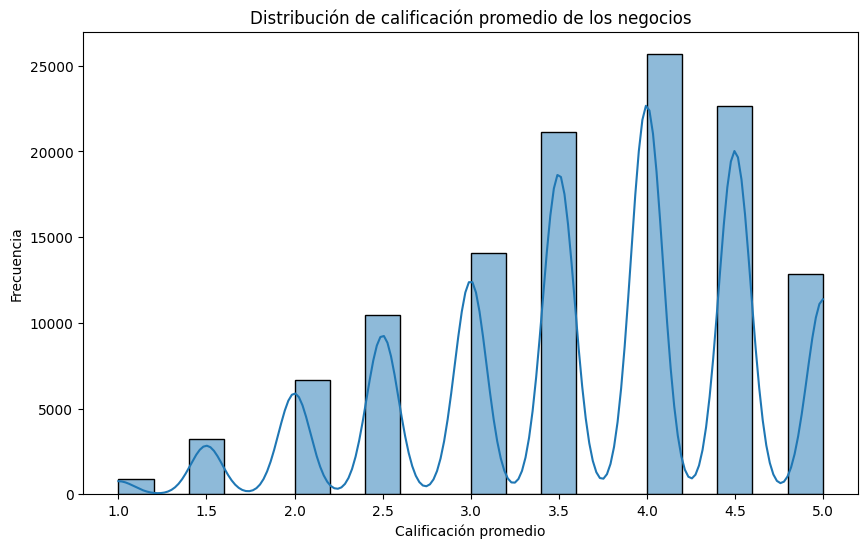

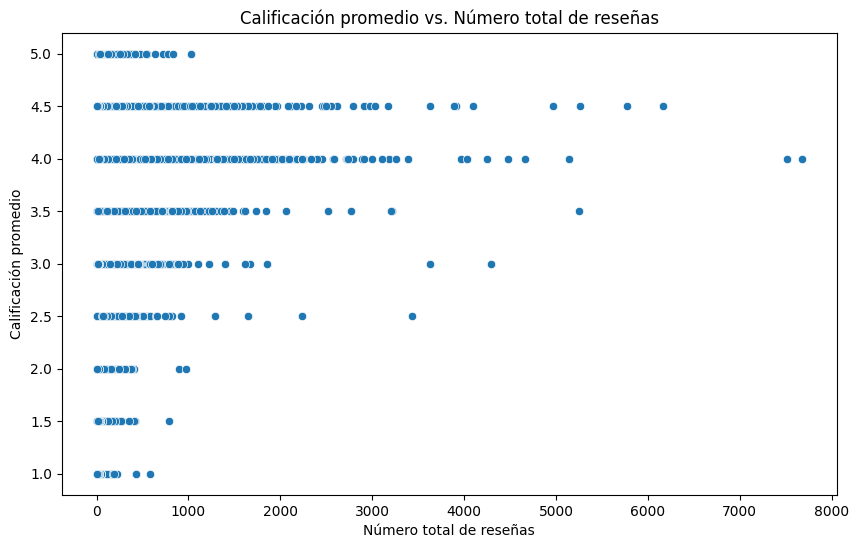

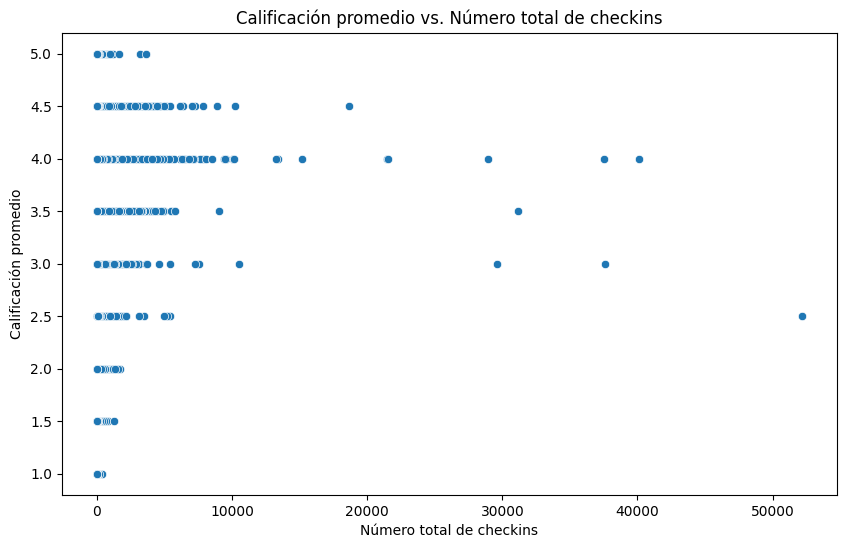

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la calificación promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=business_df, x='stars', bins=20, kde=True)
plt.title('Distribución de calificación promedio de los negocios')
plt.xlabel('Calificación promedio')
plt.ylabel('Frecuencia')
plt.show()

# Scatter plot de la calificación promedio vs. número total de reseñas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=business_df, x='total_reviews', y='stars')
plt.title('Calificación promedio vs. Número total de reseñas')
plt.xlabel('Número total de reseñas')
plt.ylabel('Calificación promedio')
plt.show()

# Scatter plot de la calificación promedio vs. número total de checkins
plt.figure(figsize=(10, 6))
sns.scatterplot(data=business_df, x='total_checkins', y='stars')
plt.title('Calificación promedio vs. Número total de checkins')
plt.xlabel('Número total de checkins')
plt.ylabel('Calificación promedio')
plt.show()
